In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('data/ApplicantProject.csv')
df

,Number,Created Date,Priority,Account,ACV,Upcoming ACV Opportunities,AccountCountry,AccountIndustry,Created Month,InquiryType
0,CS96304,1/1/20 2:30 AM,Very Low,Random AccountName 142,"$10,125,545.34","$(121,800.28)",United Kingdom,Retailer,2020-1,Question about the product
1,CS71638,1/2/20 7:10 PM,High,Random AccountName 154,"$873,271.83","$159,409.06",Mexico,Information Security,2020-1,Question about the product
2,CS44369,1/4/20 4:50 AM,High,Random AccountName 127,"$11,961,103.07","$2,752,627.26",Mexico,Information Security,2020-1,Question about the product
3,CS61103,1/5/20 2:01 AM,Critical,Random AccountName 179,"$64,658,626.07","$47,779.11",Canada,Technology,2020-1,Issue with the product
4,CS67928,1/5/20 3:08 AM,High,Random AccountName 115,"$16,274,282.36","$377,871.90",Japan,Information Security,2020-1,Question about the product
...,...,...,...,...,...,...,...,...,...,...
2052,CS88712,7/23/23 10:13 AM,Critical,Random AccountName 149,"$39,219,548.74","$382,767.33",Mexico,Technology,2023-7,Contract Support
2053,CS33799,7/23/23 9:52 PM,Critical,Random AccountName 25,"$4,211,894.37","$58,110.85",Japan,Information Security,2023-7,Question about the product
2054,CS69674,7/25/23 12:17 AM,Very Low,Random AccountName 226,"$3,750,328.78","$2,332,468.69",Germany,Technology,2023-7,Contract Support
2055,CS80200,7/26/23 5:29 PM,Low,Random AccountName 119,"$48,217,327.48","$(267,980.09)",Mexico,Technology,2023-7,Question about the product


# Data Cleaning 

In [6]:
df.dtypes

Number                          object
Created Date                    object
Priority                        object
Account                         object
 ACV                            object
 Upcoming ACV Opportunities     object
AccountCountry                  object
AccountIndustry                 object
Created Month                   object
InquiryType                     object
dtype: object

In [68]:
# rename columns so they don't have spaces (bad formatting)
df = df.rename(columns = {'Created Date': 'CreatedDate', ' ACV ':'ACV', ' Upcoming ACV Opportunities ':'UpcomingACVOpportunities', 'Created Month':'CreatedMonth'})

In [69]:
df.dtypes

Number                      object
CreatedDate                 object
Priority                    object
Account                     object
ACV                         object
UpcomingACVOpportunities    object
AccountCountry              object
AccountIndustry             object
CreatedMonth                object
InquiryType                 object
dtype: object

In [70]:
# convert date to datetime object 
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])
df['CreatedMonth'] = df['CreatedDate'].dt.strftime('%Y-%m')

In [71]:
# convert account number to just the number 
df['Account'] = df['Account'].apply(lambda x: x.split(' ')[-1])  

In [72]:
# convert ACV and Upcoming ACV to number instead of strings 
df['ACV'] = df['ACV'].replace('[\$,]', '', regex=True).astype(float)
df['UpcomingACVOpportunities'] = pd.to_numeric(df['UpcomingACVOpportunities'].str.replace('[\$,]', '', regex=True).replace(r'\(', '-', regex=True).replace(r'\)', '', regex=True))

# Summary Statistics 

In [74]:
df.head()

,Number,CreatedDate,Priority,Account,ACV,UpcomingACVOpportunities,AccountCountry,AccountIndustry,CreatedMonth,InquiryType
0,CS96304,2020-01-01 02:30:00,Very Low,142,10125545.34,-121800.28,United Kingdom,Retailer,2020-01,Question about the product
1,CS71638,2020-01-02 19:10:00,High,154,873271.83,159409.06,Mexico,Information Security,2020-01,Question about the product
2,CS44369,2020-01-04 04:50:00,High,127,11961103.07,2752627.26,Mexico,Information Security,2020-01,Question about the product
3,CS61103,2020-01-05 02:01:00,Critical,179,64658626.07,47779.11,Canada,Technology,2020-01,Issue with the product
4,CS67928,2020-01-05 03:08:00,High,115,16274282.36,377871.90,Japan,Information Security,2020-01,Question about the product


<AxesSubplot:>

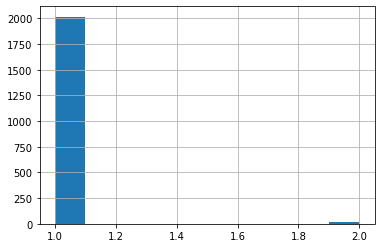

In [75]:
# check if Number column has unique values 
df['Number'].value_counts().hist()

Very few duplicate number values -> look into which ones are duplicated 

In [49]:
df[df.duplicated('Number', keep=False)].sort_values(by = 'Number')

,Number,CreatedDate,Priority,Account,ACV,UpcomingACVOpportunities,AccountCountry,AccountIndustry,CreatedMonth,InquiryType
147,CS11864,2020-05-25 08:05:00,Critical,129,39265316.11,1691056.49,Germany,Technology,2020-05,Question about the product
763,CS11864,2022-02-11 03:37:00,Critical,149,39219548.74,382767.33,United Kingdom,Information Security,2022-02,Contract Support
2015,CS13766,2023-06-23 21:29:00,Critical,176,37687729.63,2323593.97,India,Technology,2023-06,Issue with the product
297,CS13766,2020-10-22 12:29:00,Critical,217,6933203.35,2416595.05,Japan,Technology,2020-10,Issue with the product
497,CS14413,2021-05-23 03:30:00,Medium,113,16941362.05,154084.67,United Kingdom,Retailer,2021-05,Contract Support
619,CS14413,2021-09-19 19:03:00,Very Low,155,10950966.82,4966.27,Norway,Public Sector,2021-09,Question about the product
1884,CS19407,2023-05-05 01:38:00,Critical,181,16699602.25,332534.46,Finland,Public Sector,2023-05,Contract Support
1311,CS19407,2023-03-10 12:35:00,Medium,155,10950966.82,4966.27,United Kingdom,Public Sector,2023-03,Contract Support
1767,CS22138,2023-04-04 00:07:00,Very Low,170,4134839.56,977171.53,United Kingdom,Public Sector,2023-04,Question about the product
1672,CS22138,2023-03-18 08:26:00,Low,48,6091837.52,562381.46,United States,Information Security,2023-03,Question about the product


In [50]:
df[df.duplicated('Account', keep=False)].sort_values(by = 'Account')

,Number,CreatedDate,Priority,Account,ACV,UpcomingACVOpportunities,AccountCountry,AccountIndustry,CreatedMonth,InquiryType
62,CS12124,2020-03-02 17:36:00,Low,1,40003737.93,86165.85,Mexico,Finance,2020-03,Contract Support
887,CS62567,2022-06-10 11:46:00,Critical,1,40003737.93,86165.85,United States,Public Sector,2022-06,Contract Support
1689,CS28366,2023-03-19 00:32:00,Low,1,40003737.93,86165.85,France,Finance,2023-03,Contract Support
1381,CS18142,2023-03-11 13:34:00,Critical,1,40003737.93,86165.85,Mexico,Public Sector,2023-03,Question about the product
2046,CS19616,2023-07-17 20:46:00,Low,1,40003737.93,86165.85,Canada,Retailer,2023-07,Contract Support
...,...,...,...,...,...,...,...,...,...,...
1805,CS96772,2023-04-13 20:18:00,Critical,99,2049471.40,271582.04,United States,Public Sector,2023-04,Issue with the product
193,CS42500,2020-07-05 12:46:00,Very Low,99,2049471.40,271582.04,India,Retailer,2020-07,Issue with the product
486,CS84882,2021-05-10 21:08:00,Very Low,99,2049471.40,271582.04,Mexico,Public Sector,2021-05,Contract Support
1898,CS85818,2023-05-08 21:27:00,Medium,99,2049471.40,271582.04,Japan,Technology,2023-05,Question about the product


Here we see it is possible for the same account to have different cases, countries, and industries -> meaning it represents different companies and that the same case can be 

<AxesSubplot:>

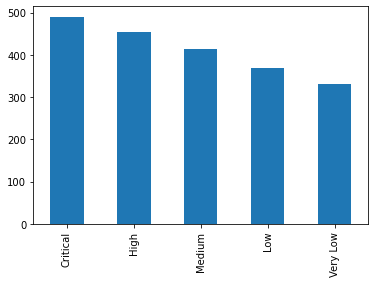

In [54]:
# Check distribution of priority values 
df['Priority'].value_counts().plot(kind='bar')

Seems like a balanced dataset for priority values 

In [56]:
# How many unique accounts are in this dataset
df['Account'].nunique()

264

In [76]:
# Analyze distributions of ACV columns 
df.describe()

,ACV,UpcomingACVOpportunities
count,2.057000e+03,2.057000e+03
mean,2.111781e+07,7.426303e+05
std,1.811208e+07,9.845805e+05
min,8.007830e+03,-7.710434e+05
25%,6.933203e+06,4.028471e+04
50%,1.517604e+07,4.636800e+05
75%,3.339220e+07,1.283994e+06
max,7.698662e+07,3.913133e+06


In [77]:
# check for any outliers with ACV 
q1 = df['ACV'].quantile(0.25)
q3 = df['ACV'].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df['ACV'] < lower) | (df['ACV'] > upper)]
outliers

,Number,CreatedDate,Priority,Account,ACV,UpcomingACVOpportunities,AccountCountry,AccountIndustry,CreatedMonth,InquiryType
75,CS32524,2020-03-13 16:51:00,Very Low,173,75431069.94,-22723.57,Canada,Technology,2020-03,Question about the product
322,CS67852,2020-11-20 00:34:00,Critical,58,76986619.94,155263.81,France,Retailer,2020-11,Question about the product
502,CS48928,2021-05-26 08:09:00,Critical,173,75431069.94,-22723.57,Mexico,Retailer,2021-05,Question about the product
504,CS36115,2021-05-28 10:09:00,Medium,258,73097514.04,1787668.14,United Kingdom,Technology,2021-05,Question about the product
540,CS40106,2021-07-04 18:00:00,Critical,194,74880571.68,-25361.37,United Kingdom,Retailer,2021-07,Contract Support
560,CS76960,2021-07-22 02:04:00,Critical,58,76986619.94,155263.81,Mexico,Public Sector,2021-07,Question about the product
596,CS32792,2021-08-27 12:36:00,Medium,258,73097514.04,1787668.14,Canada,Public Sector,2021-08,Question about the product
617,CS35393,2021-09-17 08:27:00,Very Low,58,76986619.94,155263.81,France,Technology,2021-09,Security Concern
697,CS38210,2021-12-02 02:23:00,Critical,173,75431069.94,-22723.57,United Kingdom,Information Security,2021-12,Question about the product
727,CS16217,2021-12-31 14:42:00,Critical,194,74880571.68,-25361.37,Norway,Retailer,2021-12,Contract Support


In [78]:
outliers.shape

(21, 10)

We see that 5/21 -> close to 24% of our total outliers across the span of 3 years occur in March 2023 leading to the spike in the graph

In [82]:
# check for any outliers with UpcomingACV 
q1 = df['UpcomingACVOpportunities'].quantile(0.25)
q3 = df['UpcomingACVOpportunities'].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df['UpcomingACVOpportunities'] < lower) | (df['UpcomingACVOpportunities'] > upper)]
outliers

,Number,CreatedDate,Priority,Account,ACV,UpcomingACVOpportunities,AccountCountry,AccountIndustry,CreatedMonth,InquiryType
16,CS48307,2020-01-19 09:51:00,High,8,20258865.73,3238714.34,Norway,Finance,2020-01,Issue with the product
18,CS33189,2020-01-20 09:08:00,Critical,259,52744687.25,3234385.80,United States,Information Security,2020-01,Question about the product
24,CS94701,2020-01-24 08:41:00,Critical,187,3231392.81,3575358.19,Finland,Public Sector,2020-01,Contract Support
32,CS16462,2020-02-03 00:14:00,Critical,230,26043027.58,3193199.28,United States,Technology,2020-02,Contract Support
42,CS49401,2020-02-11 22:41:00,Medium,139,29558682.21,3913132.93,Japan,Information Security,2020-02,Contract Support
...,...,...,...,...,...,...,...,...,...,...
1968,CS48527,2023-06-03 05:06:00,Very Low,187,3231392.81,3575358.19,Canada,Public Sector,2023-06,Question about the product
2022,CS32920,2023-06-27 09:21:00,Very Low,259,52744687.25,3234385.80,Norway,Information Security,2023-06,Issue with the product
2030,CS74229,2023-07-04 09:30:00,Medium,230,26043027.58,3193199.28,France,Retailer,2023-07,Security Concern
2037,CS20147,2023-07-10 03:52:00,Low,187,3231392.81,3575358.19,Finland,Technology,2023-07,Question about the product


<AxesSubplot:>

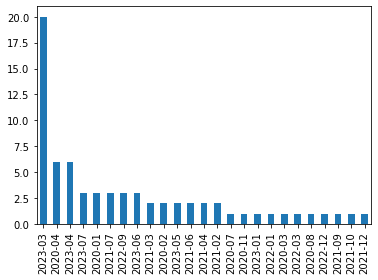

In [92]:
outliers['CreatedMonth'].value_counts().plot(kind='bar')

The outliers for UpcomingACV are also in March 2023 however they are not the same cases for ACV outliers? 

In [93]:
outliers[outliers['CreatedMonth']=='2023-03']

,Number,CreatedDate,Priority,Account,ACV,UpcomingACVOpportunities,AccountCountry,AccountIndustry,CreatedMonth,InquiryType
1216,CS29893,2023-03-08 22:55:00,High,8,20258865.73,3238714.34,Finland,Public Sector,2023-03,Question about the product
1235,CS57153,2023-03-09 08:58:00,High,53,21840037.93,3420115.30,France,Public Sector,2023-03,Question about the product
1242,CS97695,2023-03-09 11:38:00,Critical,230,26043027.58,3193199.28,Mexico,Public Sector,2023-03,Issue with the product
1266,CS40896,2023-03-09 20:38:00,Critical,259,52744687.25,3234385.80,Norway,Public Sector,2023-03,Issue with the product
1290,CS18814,2023-03-10 04:31:00,High,230,26043027.58,3193199.28,Finland,Retailer,2023-03,Question about the product
1361,CS62779,2023-03-11 05:48:00,Medium,53,21840037.93,3420115.30,France,Public Sector,2023-03,Question about the product
1364,CS64360,2023-03-11 07:07:00,Medium,139,29558682.21,3913132.93,Japan,Finance,2023-03,Question about the product
1380,CS69900,2023-03-11 13:20:00,Critical,230,26043027.58,3193199.28,Norway,Public Sector,2023-03,Security Concern
1413,CS25262,2023-03-12 03:03:00,Medium,8,20258865.73,3238714.34,Mexico,Public Sector,2023-03,Issue with the product
1450,CS20394,2023-03-12 18:03:00,Critical,8,20258865.73,3238714.34,India,Public Sector,2023-03,Contract Support


<AxesSubplot:>

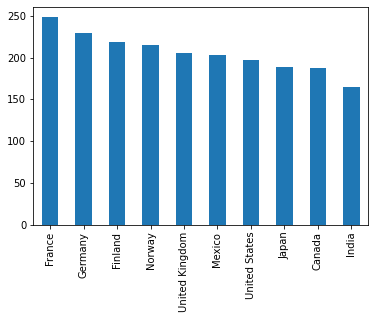

In [95]:
# check distribution of AccountCountry
df['AccountCountry'].value_counts().plot(kind='bar')

Well balanced dataset for locations as well -> if there is a certain country producing the most amount of ACV with cases it does not have to do with location size 

<AxesSubplot:>

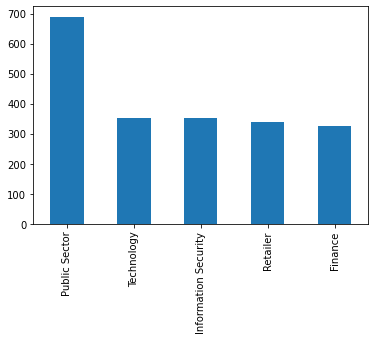

In [96]:
# check distribution of AccountIndustry
df['AccountIndustry'].value_counts().plot(kind='bar')

Almost twice as many accounts come from the public sector compared to any other industry -> just because outliers in march are associated with public sector industry doesn't mean that is a statistically significant correlation 

<AxesSubplot:>

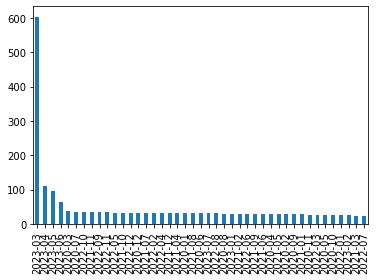

In [97]:
# check distribution of months
df['CreatedMonth'].value_counts().plot(kind='bar')

March 2023 also has the highest # of cases created (almost 6 times as many!!) -> something must have happened with a product or technical outage etc in that time to have caused so many cases and thus increase the amount of ACV 

<AxesSubplot:>

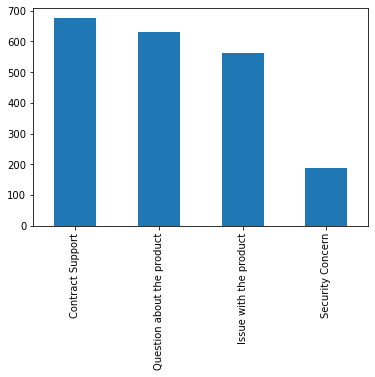

In [99]:
# check distribution of InquiryType
df['InquiryType'].value_counts().plot(kind='bar')

Decently balanced distribution of type of inquiry -> it's possible if security concerns are low that they rarely happen and maybe all of them happened in March due to security threat? 